### Market Segmentation 1

In [1]:
#import important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

In [2]:
#read data
df = pd.read_csv('udemy_data/3.12. Segmentation_1.csv')
df.head()
#satisfaction is retting from user (1-10)
#loyality: customer who purchses for 1 year + other factors (-2.5 until 2.5)

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


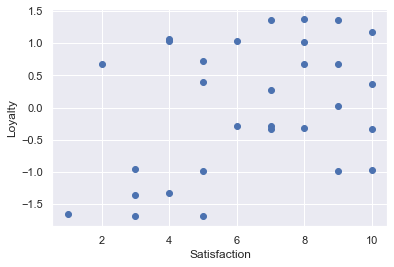

In [3]:
#plot the data
plt.scatter(df['Satisfaction'],df['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

In [4]:
#clustering 
kmeans = KMeans(2)
kmeans.fit(df)

KMeans(n_clusters=2)

In [7]:
cluster = df.copy()
cluster['Label']=kmeans.predict(df) #add the cluster data with label
cluster.head()

,Satisfaction,Loyalty,Label
0,4,-1.33,0
1,6,-0.28,0
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,0


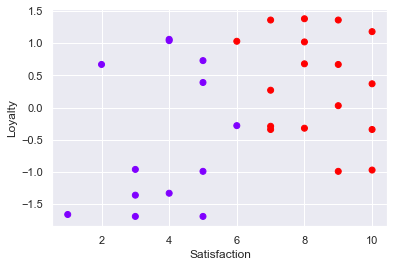

In [8]:
#plot the new data
plt.scatter(cluster['Satisfaction'], cluster['Loyalty'], c=cluster['Label'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

- Look at the plot, if we defided the data to 4 segment. it looks like something went wrong. Cluster like left side and right side.
- Althoug we know that we can group it into 2 groups (bottom left and right top). So what's the problems..? The scale of satisfaction and loyalty is much different. We need to standardize the scale.

In [9]:
#standardize the variables
from sklearn import preprocessing

In [10]:
df2 = preprocessing.scale(df)
df2

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

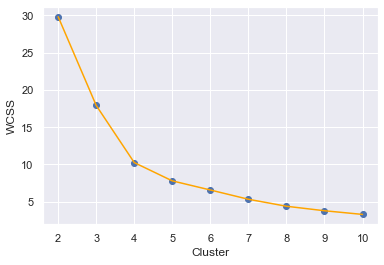

In [11]:
#find the best number of clusters using Lbow method
wcss = []
for i in range (2,11):
    kmeans = KMeans(i)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)

#plot the elbow
clstr = range(2,11)
plt.scatter(clstr, wcss)
plt.plot(clstr,wcss, color='orange')
plt.xlabel("Cluster")
plt.ylabel("WCSS")
plt.show()

In [12]:
#explore clustering solution and select the number of clusters
kmeans_new = KMeans(4)
kmeans_new.fit(df2)

cluster_new = df.copy()
cluster_new['Label']=kmeans_new.predict(df2)
cluster_new.head()

,Satisfaction,Loyalty,Label
0,4,-1.33,0
1,6,-0.28,2
2,5,-0.99,0
3,7,-0.29,2
4,4,1.06,3


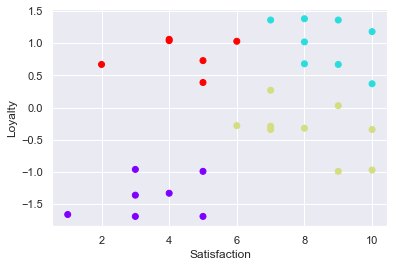

In [13]:
#plot
plt.scatter(cluster_new['Satisfaction'], cluster_new['Loyalty'], c = cluster_new['Label'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

Its better, we can grouper the custermer by
blue(Alienated), green(supporters), red(fans), puple(roamers)
now set the label in data

- from this plot we get insight how to make the alienated (min satisfaction and means loyal) customer tobe supporters or romers. Maybe we can give a lot of discount, give better service like adding the number of cassir, etc

### Dendogram with heatmaps 

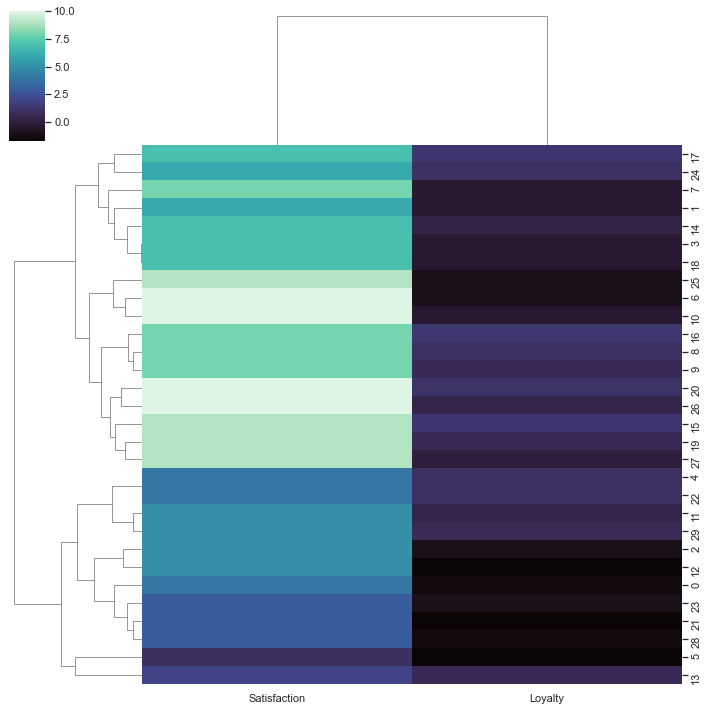

In [14]:
sns.clustermap(df, cmap='mako')

- We can see that there are 4 clusters